In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
housing=pd.read_csv("C:\\Users\\91701\\Desktop\\assingments\\housing.csv")

In [3]:
housing.head()

,CRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,NaN,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRM      505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

0    470
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,500.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620585,11.386139,11.135208,0.069307,0.554659,6.283998,68.550693,3.797597,9.566337,408.504950,18.450495,356.594376,12.662515,22.553861
std,8.608606,23.340080,6.867064,0.254227,0.115990,0.704995,28.171500,2.107013,8.707553,168.596437,2.164120,91.367787,7.144974,9.194008
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.884750,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,6.930000,17.100000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208500,77.300000,3.215700,5.000000,330.000000,19.000000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.620500,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


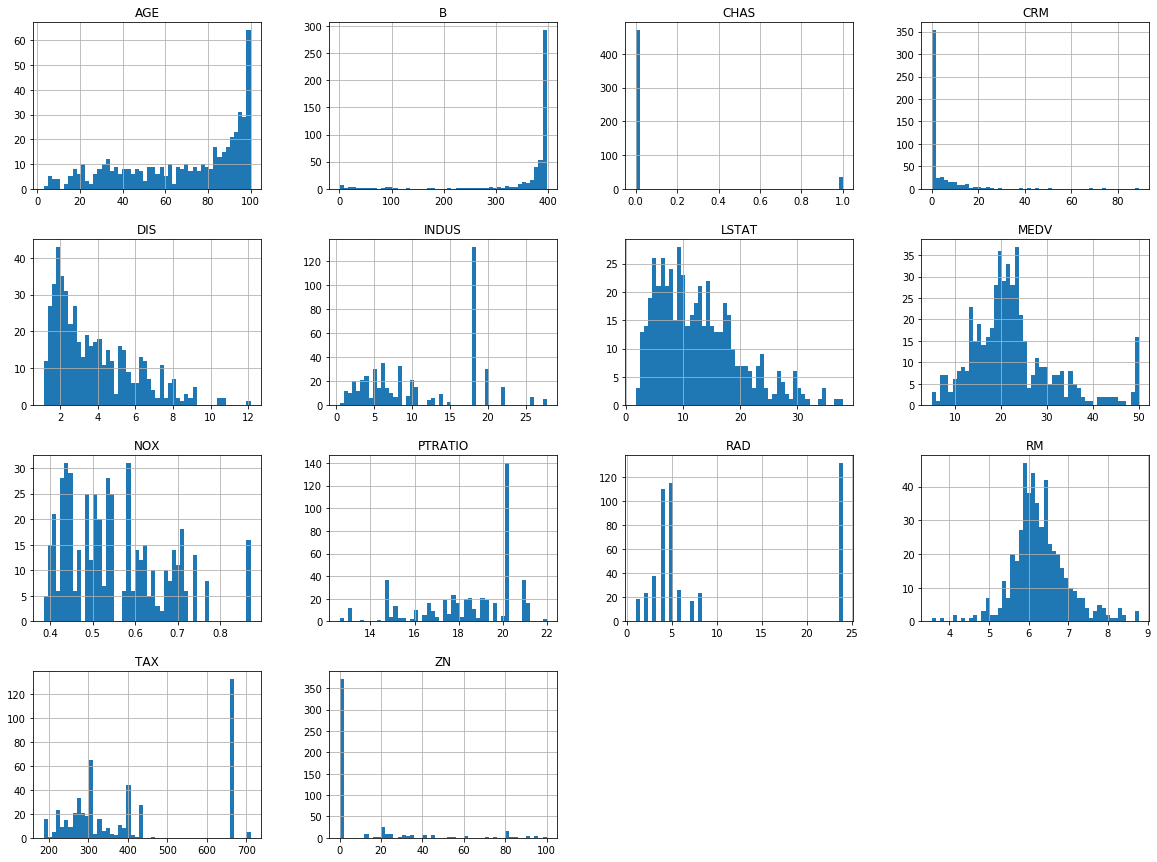

In [7]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

## Train-Test Splitting

In [8]:
#for knowledge
#def split_train_test(data,test_ratio):
    #np.random.seed(42)
    #shuffled=np.random.permutation(len(data))
    #test_set_size=int(len(data)*test_ratio)
    #test_indices=shuffled[:test_set_size]
    #train_indices=shuffled[test_set_size:]
    #return data.iloc[train_indices],data.iloc[test_indices]

In [9]:
#train_set,test_set=split_train_test(housing,0.2)

In [10]:
#print(f"rows in train set:{len(train_set)}\nRows in test:{len(test_set)}\n")

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [12]:
print(f"rows in train set:{len(train_set)}\nRows in test:{len(test_set)}\n")

rows in train set:404
Rows in test:101



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["CHAS"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [14]:
strat_train_set["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
strat_test_set["CHAS"].value_counts()

0    94
1     7
Name: CHAS, dtype: int64

In [16]:
#376/28

In [17]:
#94/7


In [18]:
housing =strat_train_set.copy()


# Looking for correlations

In [19]:
corr_matrix=housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.679944
B          0.361750
ZN         0.339881
DIS        0.240869
CHAS       0.205148
AGE       -0.363788
RAD       -0.374905
CRM       -0.393733
NOX       -0.422943
TAX       -0.456881
INDUS     -0.473671
PTRATIO   -0.494772
LSTAT     -0.740523
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257BDF652C8>,
      dtype=object)

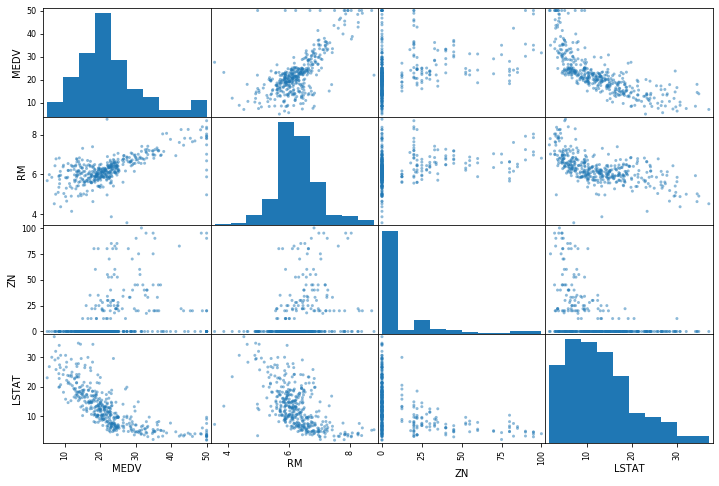

In [20]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

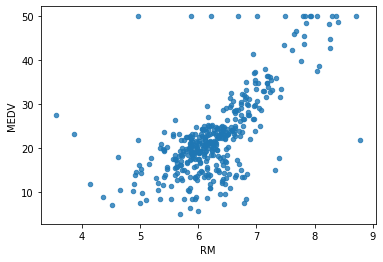

In [21]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

# Attribute combination

In [22]:
housing['TAXRM']=housing['TAX']/housing["RM"]
housing['TAXRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [23]:
housing.head()

,CRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [24]:
corr_matrix=housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.679944
B          0.361750
ZN         0.339881
DIS        0.240869
CHAS       0.205148
AGE       -0.363788
RAD       -0.374905
CRM       -0.393733
NOX       -0.422943
TAX       -0.456881
INDUS     -0.473671
PTRATIO   -0.494772
TAXRM     -0.527345
LSTAT     -0.740523
Name: MEDV, dtype: float64

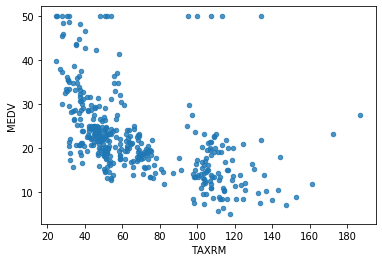

In [25]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [26]:
housing=housing.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()



# Missing value

In [27]:
#to take care of missing attribute you have three option
#to get rid of the missing data points
#to get rid of whole attribute
#set the value to some value(0,mean,median)

In [28]:
housing.dropna(subset=["RM"]).shape#option 1

(399, 14)

In [29]:
housing.drop("RM",axis=1).shape#option 2
#there is no RM coloumn

(404, 13)

In [30]:
median=housing["RM"].median()#option 3
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
from sklearn.impute import SimpleImputer
Imputer=SimpleImputer(strategy="median")
Imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [32]:
Imputer.statistics_.shape

(14,)

In [33]:
X=Imputer.transform(housing)


In [34]:
housing_tr=pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

,CRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602607,10.836634,11.339406,0.069307,0.558093,6.273604,68.924010,3.745554,9.747525,412.633663,18.468812,353.404579,12.810842,67.704716
std,8.099469,22.150636,6.878247,0.254290,0.116880,0.710975,28.293382,2.099433,8.722386,168.532844,2.125823,96.074275,7.233244,31.327586
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.892500,45.168593
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.208000,77.950000,3.122200,5.000000,341.000000,19.000000,390.955000,11.650000,55.256870
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.626000,94.100000,5.100400,24.000000,666.000000,20.200000,395.645000,17.112500,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,187.026116


# Scikit-learn design

# feature scaling

# Creating pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
                ("imputer",SimpleImputer(strategy="median")),
                ("std_scaler",StandardScaler()),
])


In [36]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [37]:
housing_num_tr.shape

(404, 14)

# Selected a desired model 

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
#model=LinearRegression()
#model=DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
prepared_data=my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.486, 25.135, 16.911, 23.422, 23.448])

In [40]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [41]:
from sklearn.metrics import mean_squared_error
housing_prediction=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_prediction)
rmse=np.sqrt(mse)#rmse is squared of mse

In [42]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_score=np.sqrt(-scores)


In [43]:
rmse_score

array([2.92166766, 2.79362663, 4.33007147, 2.62736351, 3.27101693,
       2.23002138, 4.70142058, 3.86195307, 3.19029988, 3.29940373])

In [44]:
def print_score(scores):
    print("Scores:",scores)
    print("Mean are:",scores.mean())
    print("Standard deviation are:",scores.std())


In [45]:
print_score(rmse_score)

Scores: [2.92166766 2.79362663 4.33007147 2.62736351 3.27101693 2.23002138
 4.70142058 3.86195307 3.19029988 3.29940373]
Mean are: 3.3226844844183328
Standard deviation are: 0.7311217549370702


# Saving the model

In [46]:
from joblib import dump,load
dump(model,'house_price_prediction.joblib')


['house_price_prediction.joblib']

## Testing the data

In [47]:
#Y_test=strat_test_set["MEDV"].copy()
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test["TAXRM"]=X_test['TAX']/X_test["RM"]
X_test_prepared=my_pipeline.transform(X_test)
final_prediction=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_prediction)
final_rmse=np.sqrt(final_mse)
print(final_prediction,list(Y_test))

[21.621 31.177 25.187 22.551 42.916 29.926 20.139 23.835 31.333 20.883
 20.533 12.217 22.127 33.39  19.614 11.073 10.499 14.563 24.257 18.362
 18.947 44.673 18.346 14.48  33.186 31.35  16.312 21.062  9.12  14.506
 22.821 24.073 19.597 14.38  21.355 18.928 24.888 15.071 42.173 24.452
 23.115 22.22  20.799 18.824 20.174 11.27  33.312 20.176 22.287 19.762
 29.013 21.52  14.619 24.913 18.216 42.904 19.167 20.672 46.623 10.311
 18.997 27.489 32.995 32.928 12.021 19.633 18.21  16.007 33.678 26.23
 22.712 21.159 22.165 34.941 12.992 19.969 19.708 21.005 21.294 25.886
 41.29  13.826 22.648 20.416 20.999 14.295 21.219 24.491 23.513 18.262
 27.838  7.403 25.958 18.996 29.642 25.612 30.852 14.937 27.339 26.532
 19.984] [23.2, 32.2, 30.1, 22.2, 43.1, 31.0, 19.4, 23.8, 30.3, 21.5, 24.5, 13.8, 23.0, 34.6, 19.5, 10.2, 13.1, 13.5, 16.5, 18.6, 14.4, 41.7, 10.4, 13.6, 33.2, 28.5, 15.2, 20.6, 7.2, 14.6, 20.1, 22.2, 21.7, 14.1, 23.8, 21.5, 24.7, 15.6, 44.0, 28.1, 23.6, 20.3, 23.4, 19.5, 18.7, 12.3, 32.0, 

In [48]:
final_rmse

2.7505288186416474